## K-Nearest Neighbors
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will build a K-Nearest Neighbors Model in Python and  use it on the Spotify dataset.

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.model_selection import train_test_split

sns.set_theme()

import tensorflow

In [39]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Filter by genre

classical = df[df['track_genre'] == 'classical']
hiphop = df[df['track_genre'] == 'hip-hop']
black_metal = df[df['track_genre'] == 'black-metal']

comb = pd.concat([classical, hiphop, black_metal])

### Background

To showcase the abilities of KNN, we wanted to take different audio metric data of three distinct genres and train a KNN model to classify a songs genre. After analyzing the data, the three district genres each with a significant amount of data that I chose were classical, hip-hop, and black metal.

              precision    recall  f1-score   support

 black-metal       0.96      0.98      0.97       251
   classical       0.95      0.97      0.96       190
     hip-hop       0.95      0.90      0.92       143

    accuracy                           0.96       584
   macro avg       0.95      0.95      0.95       584
weighted avg       0.96      0.96      0.96       584



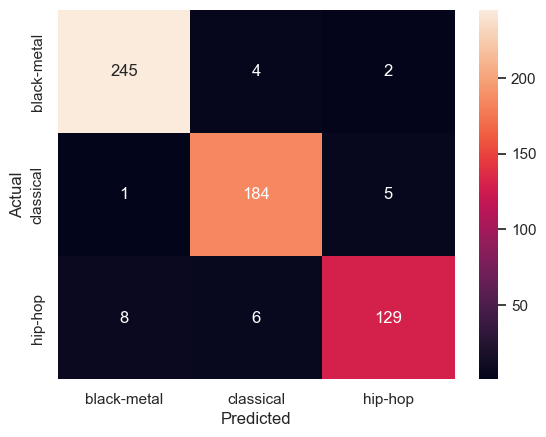

In [47]:
# Build KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data

X = comb[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = comb['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

As we can see from the output, the model performs well on the test data. All genres have precision, recall, and F1-score values close to 1.0, which means that the model correctly classifies almost all instances of each genre. This is further validated by the confusion matrix, which shows that the model correctly classifies the majority of instances in the test data.